In [10]:
from pandas import read_csv, DataFrame
from os import listdir
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [11]:
decode_names = {
14 : '28313',
15 : '28314',
16 : '28315', 
17 : '28316', }

decode_names_new = {}

for i in decode_names.keys():
    if len(str(i)) == 1:
        decode_names_new[f'barcode0{i}.fastq'] = decode_names[i]
    else:
        decode_names_new[f'barcode{i}.fastq'] = decode_names[i]

In [12]:
sorted_names = ['28313', '28314', '28315', '28316']

In [33]:
all_sampeles = {}
tatab = {}
otu_code = {}
rename_dict = {}

c = 0

for samp in tqdm(decode_names_new.keys()):
    if 'barcode' not in samp:continue
    all_sampeles[samp] = {}
    opn_kraken2_tab = read_csv(f'/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/S_PYOGENES/16S/wf_out_minimap/{samp}/abundance_table_species.tsv', sep='\t')
    for idx in opn_kraken2_tab.index:
    
        sp = opn_kraken2_tab['tax'][idx].split(';')[-1]
        #print(sp)
      #  print(opn_kraken2_tab['tax'][idx].split(';'))
        if 'Bacteria' not in opn_kraken2_tab['tax'][idx].split(';')[0]:continue
        if sp not in all_sampeles[samp].keys():

            all_sampeles[samp][sp] = 0
            tatab[sp] = {'Kingdom' : opn_kraken2_tab['tax'][idx].split(';')[0],
                         'Phylum' : opn_kraken2_tab['tax'][idx].split(';')[1],
                         'Class' : opn_kraken2_tab['tax'][idx].split(';')[2],
                         'Order' : opn_kraken2_tab['tax'][idx].split(';')[3],
                         'Family' : opn_kraken2_tab['tax'][idx].split(';')[4],
                         'Genus' : opn_kraken2_tab['tax'][idx].split(';')[-2],
                         'Species' : opn_kraken2_tab['tax'][idx].split(';')[-1]}
            otu_code[sp] = f'OTU{c}'
            rename_dict[f'OTU{c}'] = sp
            c += 1
        #print( opn_kraken2_tab['total'][idx])
        all_sampeles[samp][sp] += opn_kraken2_tab['total'][idx]
        
all_sampeles = DataFrame(all_sampeles).fillna(0)
all_sampeles = all_sampeles.rename(columns=decode_names_new)
all_sampeles = all_sampeles[sorted_names]
all_sampeles.T.rename(columns=otu_code).to_csv('16S_all_data.tsv', sep='\t')
DataFrame(tatab).T.rename(index=otu_code).to_csv('Taxtab.tsv', sep='\t')


sample_data = {}

for i in all_sampeles.columns:
    if 'k-' in i:
        
        sample_data[i] = {'is.neg' : 'TRUE'}
    else:
        sample_data[i] = {'is.neg' : 'FALSE'}

DataFrame(sample_data).T.to_csv('sample_data.tsv', sep='\t')

contaminants = read_csv('/mnt/iscsidisk1/runs/runs-krivonos/PROJECTS/S_PYOGENES/comtam_res.tsv', sep='\t')
#all_sampeles = all_sampeles.T.rename(columns=otu_code)[contaminants.index[contaminants.contaminant!=1]].rename(columns=rename_dict).T

all_sampeles = all_sampeles[all_sampeles.mean(axis=1) > 10]
#from skbio.stats.composition import clr 
#clr_data= DataFrame(data=clr((all_sampeles+1)/(all_sampeles+1).sum(axis=0).T), index=all_sampeles.index, columns=all_sampeles.columns)
all_sampeles = all_sampeles/all_sampeles.sum(axis=0)
all_sampeles = all_sampeles.assign(m=all_sampeles.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(all_sampeles.columns)]
all_sampeles = all_sampeles[sorted_names]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 58.74it/s]


In [41]:
subset = all_sampeles['28313'].sort_values()[::-1]

for i in subset.index:
    if np.round(subset.loc[i]*100, 1) == 0: continue
    print(f'{i}\t{np.round(subset.loc[i]*100, 1)}%')
    

Streptococcus pyogenes	30.3%
Prevotella melaninogenica	6.4%
Moraxella catarrhalis	4.0%
Prevotella histicola	4.0%
Moraxella nonliquefaciens	3.6%
Leptotrichia wadei	3.6%
Prevotella pallens	3.4%
Veillonella atypica	3.3%
Veillonella dispar	2.8%
Haemophilus parainfluenzae	2.4%
Fusobacterium pseudoperiodonticum	2.3%
Alloprevotella rava	2.3%
Prevotella jejuni	2.3%
Streptococcus salivarius	2.1%
Neisseria perflava	1.8%
Streptococcus oralis	1.8%
Campylobacter concisus	1.7%
Prevotella salivae	1.5%
Schaalia odontolytica	1.4%
Prevotella vespertina	1.3%
Streptococcus mitis	1.3%
Rothia mucilaginosa	1.3%
Granulicatella adiacens	1.2%
Selenomonas felix	1.1%
Haemophilus influenzae	1.1%
Streptococcus cristatus	1.1%
Haemophilus parahaemolyticus	1.0%
Streptococcus infantis	1.0%
Neisseria polysaccharea	0.9%
Lancefieldella parvula	0.9%
Haemophilus aegyptius	0.9%
Gemella taiwanensis	0.8%
Streptococcus parasanguinis	0.8%
Veillonella nakazawae	0.7%
Gemella haemolysans	0.6%
Porphyromonas pasteri	0.6%
Streptococcu

In [36]:
all_sampeles_subset = all_sampeles[all_sampeles.columns[:4]]

In [37]:
import random
def get_color(tax_list):
        
    color = ''
    
    while color not in tax_list.values() and color == '':
        
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    return color
    
Color_collection = {}

for i in all_sampeles_subset.index:
    
    Color_collection[i] = get_color(Color_collection)    

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 17.55it/s]


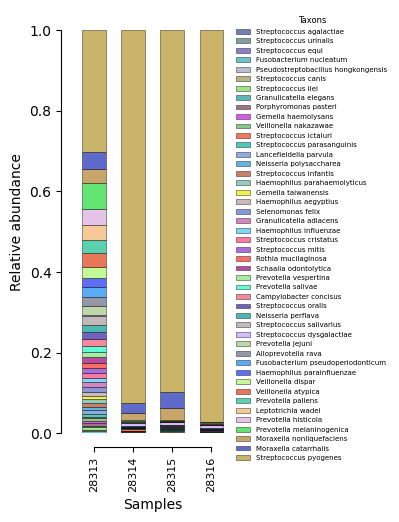

In [38]:
width = 0.6
sample_coord = 0 
fst = True
all_coords = []
legend_stack = []
plt.figure(figsize=(2, 5.5))
for sample in tqdm(all_sampeles_subset.columns):
    
    bottom = 0
    all_coords.append(sample_coord)
    
    for otu in all_sampeles_subset.index:
        if otu not in legend_stack:
            plt.bar(sample_coord, 
                          all_sampeles_subset[sample][otu], 
                          width, 
                          label=otu, 
                          bottom=bottom,
                          edgecolor='black',
                          linewidth=0.4, 
                          alpha=.7,
                          color=Color_collection[otu])
            legend_stack.append(otu)
        else:
            plt.bar(sample_coord, 
                          all_sampeles_subset[sample][otu], 
                          width, 
                          bottom=bottom,
                          edgecolor='black',
                          alpha=.7,
                          linewidth=0.4, 
                          color=Color_collection[otu])
        bottom += all_sampeles_subset[sample][otu]
    sample_coord += 1
plt.xticks(all_coords, 
           all_sampeles_subset.columns, 
           rotation=40, 
           fontsize=8)
plt.legend(bbox_to_anchor=(1, 1), 
           fontsize=5, 
           title='Taxons',
           frameon=False, 
           title_fontsize=6)
plt.ylabel('Relative abundance')
sns.despine(offset=10, trim=True)
plt.xticks(all_coords, 
           all_sampeles_subset.columns, 
           rotation=90, 
           fontsize=8)
plt.xlabel('Samples')
#plt.savefig('METAGENOMES.pdf', bbox_inches='tight')
#plt.savefig('METAGENOMES.png', dpi=800, bbox_inches='tight')
plt.show()

Text(312.06186868686865, 0.5, 'Minute')

<Figure size 1000x1000 with 0 Axes>

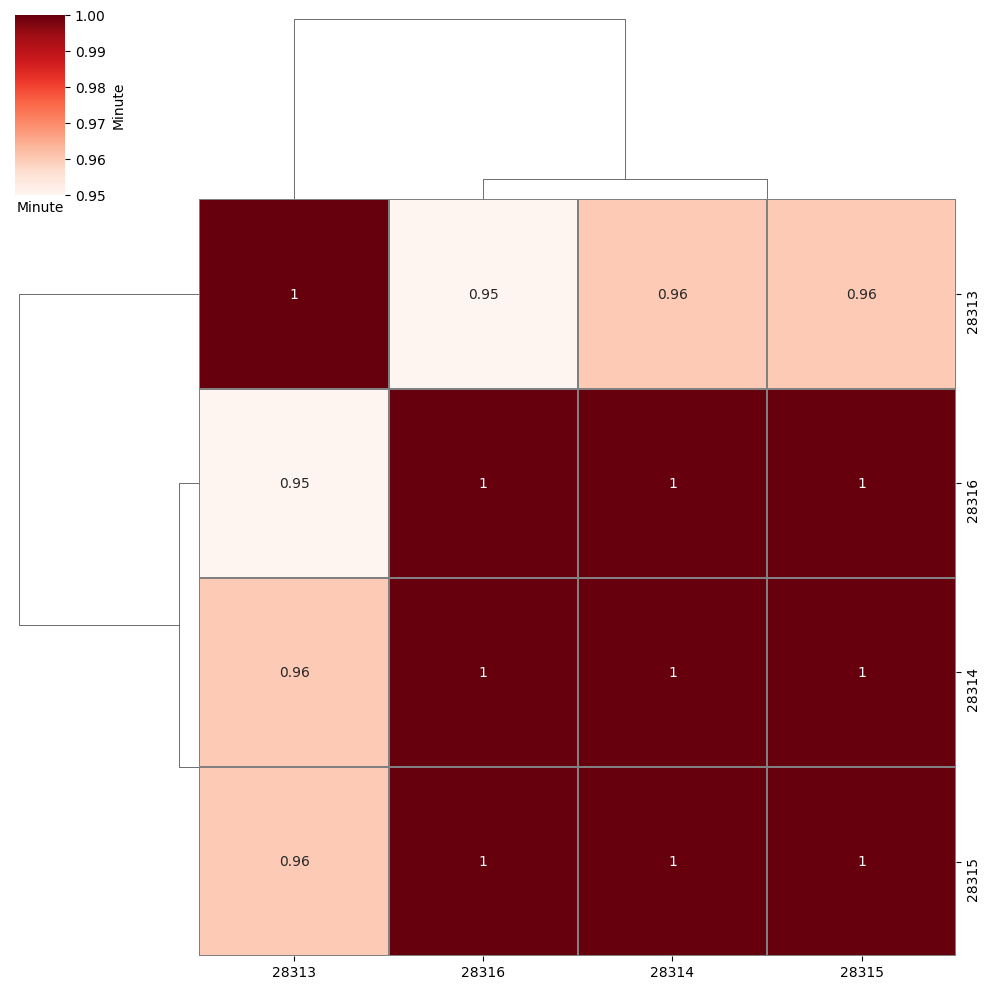

In [39]:
plt.figure(figsize=(10, 10))

sns.clustermap(np.round(all_sampeles.corr(), 2), cmap='Reds', linewidths=.01, linecolor='grey', annot=True)
plt.xlabel('Minute')
plt.ylabel('Minute')